
## <center>实验七 Python综合应用</center>

姓名： 谢大伟                           学号： 9109223004                  班级：计算机科学与技术231班   

### 一、实验目的
1. 了解Python在文本分析、科学计算和数据分析等方面得具体应用。
2. 掌握Python应用程序得的编写方法。


### 二、实验内容
1. 下载一篇格式为文本文件的中文小说，制作高频词云并统计出场次数最多的10个人物。
2. 完成教材233页的课后练习第1、2题。



### 三 实验步骤

1. 下载一篇格式为文本文件的中文小说，制作高频词云并统计出场次数最多的10个人物。

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache
Loading model cost 0.523 seconds.
Prefix dict has been built successfully.


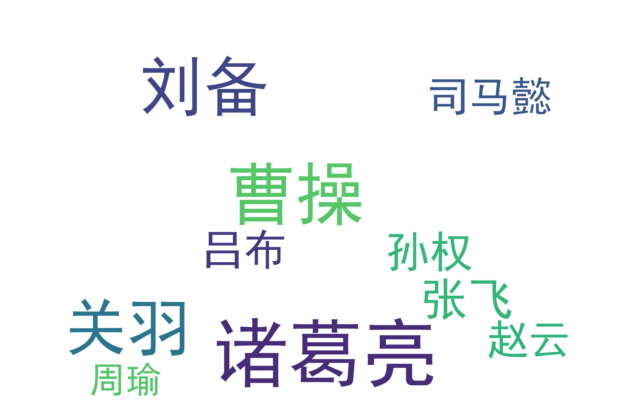

词云已保存至：《三国演义》_词频_词云.png
诸葛亮	1090
曹操	935
刘备	825
关羽	769
张飞	367
孙权	317
吕布	304
赵云	287
司马懿	286
周瑜	214


In [1]:
import jieba
import os
import wordcloud
import matplotlib.pyplot as plt
from imageio import imread
#得到文本
def getText(filepath):
    with open(filepath,"r",encoding = 'utf-8') as f:
        text = f.read()
        return text

#增加停用词
def stopwordslist(filepath):
    stopwords = [line.strip() for line in  open(filepath, 'r',encoding='utf-8').readlines()]
    return stopwords

#分频统计词频
def wordFreq(filepath,text,topn):
    #使用jieba库中的lcut对文本文件分词
    words = jieba.lcut(text.strip())
    counts = {}
    stopwords = stopwordslist('stop_words.txt')
    #删除长度为1的字符
    for word in words:
        if len(word) == 1:
            continue
        elif word not in stopwords :
    # 人物名称统一处理
            if word == '云长'or word == '关公': word = '关羽'
            elif word == '玄德': word = '刘备'
            elif word == '孟德': word = '曹操'
            elif word == '翼德': word = '张飞' 
            elif word == '子龙': word = '赵云'
            elif word == '奉先': word = '吕布'
            elif word == '仲达': word = '司马懿'
            elif word == '公瑾': word = '周瑜'
            elif word == '伯符': word = '孙策'
            elif word == '仲谋': word = '孙权'
            elif word == '文远': word = '张辽'
            elif word == '妙才': word = '夏侯渊'
            elif word == '元让': word = '夏侯惇'
            elif word == '子和': word = '曹纯'
            elif word == '文若': word = '荀彧'
            elif word == '奉孝': word = '郭嘉'
            elif word == '子孝': word = '曹仁'
            elif word == '文和': word = '贾诩'
            elif word == '汉升': word = '黄忠'
            elif word == '幼平': word = '周泰'
            elif word == '子明': word = '吕蒙'
            elif word == '子敬': word = '鲁肃'
            elif word == '兴霸': word = '甘宁'
            elif word == '元直': word = '徐庶'
            elif word == '士元': word = '庞统'
            elif word == '孔明': word = '诸葛亮'
            elif word == '季常': word = '马良'
            elif word == '文长': word = '魏延'
            elif word == '孝直': word = '法正'
            elif word == '子衡': word = '步骘'
            elif word == '子布': word = '张昭'
            # 女性角色
            elif word == '尚香': word = '孙夫人'
            elif word == '蝉儿': word = '貂蝉'
            # 君主尊称
            elif word == '吴侯': word = '孙权'
            elif word == '晋王': word = '司马昭'
            # 敌我双方称呼
            elif word == '诸葛村夫': word = '诸葛亮'
            elif word == '碧眼儿': word = '孙权'
            # 父子兄弟
            elif word == '伯约': word = '姜维'
            elif word == '思远': word = '张悌'
            # 特殊称谓
            elif word == '卧龙': word = '诸葛亮'
            elif word == '凤雏': word = '庞统'
            elif word == '虎痴': word = '许褚'
            elif word == '冢虎': word = '司马懿'
            # 异族首领
            elif word == '单于': word = '匈奴王'
            elif word == '大汗': word = '轲比能'
            # 补充遗漏
            elif word == '子远': word = '许攸'
            elif word == '公台': word = '陈宫'
            elif word == '元皓': word = '田丰'
            elif word == '异度': word = '蒯越'
            elif word == '子将': word = '许劭'
            # 处理复姓
            elif word in ['孔明', '诸葛']: word = '诸葛亮'
            elif word in ['仲达', '司马']: word = '司马懿'
            
            counts[word] = counts.get(word,0) + 1
    items = list(counts.items())
    items.sort(key = lambda x:x[1], reverse = True )
    with open(filepath[:-4]+'_词频.txt',"w",encoding = 'utf-8') as f:
        for i in range(topn):
            word,count = items[i]
            f.write("{}\t{}\n".format(word,count))
    return f,items[:topn]

def create_wordcloud(freq_file, font_path='simhei.ttf', mask_file=None):
    # 读取词频文件
    with open(freq_file, 'r', encoding='utf-8') as f:
        text = f.read()
    
    # 将词频转换为字典
    freq_dict = {}
    for line in text.split('\n'):
        if '\t' in line:
            word, count = line.split('\t')
            freq_dict[word] = int(count)
    
    # 设置词云参数
    wc = wordcloud.WordCloud(
        font_path=font_path,    # 中文字体（需要下载simhei.ttf）
        width=1200,             # 宽度
        height=800,             # 高度
        background_color='white',# 背景色
        max_words=200,          # 最大显示词数
        max_font_size=150,      # 最大字体尺寸
        scale=2,                # 清晰度倍增系数
        collocations=False,     # 避免重复词汇
        prefer_horizontal=0.9  # 水平显示比例
    )
    
    # 如果有蒙版图片
    if mask_file and os.path.exists(mask_file):
        mask = imread(mask_file)
        wc.mask = mask
    
    # 生成词云
    wc.generate_from_frequencies(freq_dict)
    
    # 显示词云
    plt.figure(dpi=120)  # 设置显示分辨率
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    # 保存图片
    wc.to_file(freq_file[:-4]+'_词云.png')
    print(f"词云已保存至：{freq_file[:-4]}_词云.png")

def main():
    os.chdir(r"D:\studycode\python\pytest\test7")
    filepath = "《三国演义》.txt"
    text = getText(filepath)
    f1, items = wordFreq(filepath, text, 10)
    
    # 生成词云（需要simhei.ttf字体文件）
    create_wordcloud(
        freq_file=filepath[:-4]+'_词频.txt',
        font_path='simhei.ttf',
        mask_file='china_map.png'  # 可选蒙版图片
    )
    
    # 打印前10结果
    for name,freq in items:
        print("{}\t{}".format(name,freq))
if __name__ == "__main__":
    main()


2. 完成教材233页的课后练习第1题。

In [5]:

'上机测试jieba库中的分词函数，并尝试使用用户自定义词典'
import jieba
import re
import importlib
import os

def clean_jieba_cache():
    """彻底清除jieba缓存和初始化状态"""
    jieba.dt.cache = None
    jieba.dt.initialized = False
    jieba.dt.tmp_dir = None
    # 重置正则表达式为原始状态
    jieba.re_han_default = re.compile(r'([\u4E00-\u9FD5]+)', re.UNICODE)

def test_jieba_custom_dict():
    # 测试文本
    text = "我爱自然语言处理"
    
    try:
        # 清理环境（重要！）
        clean_jieba_cache()
        
        # ---------------------------
        # 场景1：原始默认分词
        # ---------------------------
        default_seg = jieba.cut(text)
        print("[场景1] 默认分词结果:", "/".join(default_seg))
        
        # ---------------------------
        # 场景2：使用文件词典
        # ---------------------------
        # 创建临时词典文件
        dict_file = "userdict.txt"
        with open(dict_file, "w", encoding="utf-8") as f:
            f.write("自然语言处理 10000 n\n")
        
        # 加载词典前再次清理环境
        clean_jieba_cache()
        jieba.load_userdict(dict_file)
        
        file_dict_seg = jieba.cut(text)
        print("[场景2] 文件词典分词:", "/".join(file_dict_seg))
        
        # ---------------------------
        # 场景3：动态添加词语
        # ---------------------------
        # 清理环境并重新初始化
        clean_jieba_cache()
        jieba.initialize()
        
        jieba.add_word("自然语言处理", freq=10000, tag='n')
        dynamic_seg = jieba.cut(text)
        print("[场景3] 动态添加分词:", "/".join(dynamic_seg))
        
        # ---------------------------
        # 场景4：调整词频强制合并
        # ---------------------------
        clean_jieba_cache()
        jieba.initialize()
        
        # 修正正则表达式（使用原始字符串）
        jieba.re_han_default = re.compile(
            r'([\u4E00-\u9FD5a-zA-Z0-9+#&._]+)',  # 注意这里的 . 不需要转义
            re.UNICODE
        )
        jieba.suggest_freq("自然语言处理", tune=True)
        
        freq_seg = jieba.cut(text)
        print("[场景4] 词频调整分词:", "/".join(freq_seg))
        
    finally:
        # 清理临时文件
        if os.path.exists(dict_file):
            os.remove(dict_file)

if __name__ == "__main__":
    test_jieba_custom_dict()

Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache
Loading model cost 0.527 seconds.
Loading model cost 0.527 seconds.
Loading model cost 0.527 seconds.
Loading model cost 0.527 seconds.
Prefix dict has been built successfully.
Prefix dict has been built successfully.
Prefix dict has been built successfully.
Prefix dict has been built successfully.
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...


[场景1] 默认分词结果: 我/爱/自然语言/处理


Loading model cost 0.510 seconds.
Loading model cost 0.510 seconds.
Loading model cost 0.510 seconds.
Loading model cost 0.510 seconds.
Prefix dict has been built successfully.
Prefix dict has been built successfully.
Prefix dict has been built successfully.
Prefix dict has been built successfully.
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache


[场景2] 文件词典分词: 我/爱/自然语言处理


Loading model cost 0.543 seconds.
Loading model cost 0.543 seconds.
Loading model cost 0.543 seconds.
Loading model cost 0.543 seconds.
Prefix dict has been built successfully.
Prefix dict has been built successfully.
Prefix dict has been built successfully.
Prefix dict has been built successfully.
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache
Loading model from cache C:\Users\谢大伟\AppData\Local\Temp\jieba.cache


[场景3] 动态添加分词: 我/爱/自然语言处理


Loading model cost 0.512 seconds.
Loading model cost 0.512 seconds.
Loading model cost 0.512 seconds.
Loading model cost 0.512 seconds.
Prefix dict has been built successfully.
Prefix dict has been built successfully.
Prefix dict has been built successfully.
Prefix dict has been built successfully.


[场景4] 词频调整分词: 我/爱/自然语言处理


3. 完成教材233页的课后练习第2题。

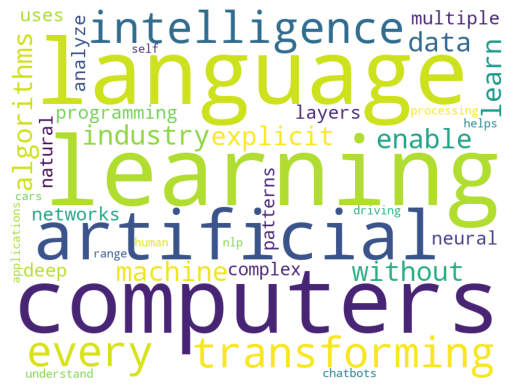

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

def generate_wordcloud(text):
    stopwords = {'the','and','of','a','in','to','is','it','that','this','be','are'}
    cleaned = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    words = [word for word in cleaned.split() if word not in stopwords and len(word)>2]
    wc = WordCloud(width=800, height=600, background_color='white', max_words=50).generate(' '.join(words))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

sample_text = """
Artificial intelligence (AI) is transforming every industry. Machine learning algorithms 
enable computers to learn from data without explicit programming. Deep learning uses neural 
networks with multiple layers to analyze complex patterns. Natural language processing (NLP) 
helps computers understand human language. AI applications range from chatbots to self-driving cars.
"""
generate_wordcloud(sample_text)

### 四 实验总结

#### Python 应用实验总结
##### 1. 实验概述
本次实验旨在了解 Python 在文本分析、科学计算和数据分析方面的具体应用，并掌握 Python 应用程序的编写方法。实验内容包括对中文小说进行文本处理制作高频词云、统计人物出场次数，以及完成教材课后练习。

##### 2. 实验心得体会
 （1）知识技能提升
通过制作词云与统计人物出场次数，深入理解了 Python 第三方库如 `jieba`（用于中文分词）、`wordcloud`（制作词云）以及数据处理相关库（如 `pandas` 用于统计分析）的使用。学会了如何读取文本文件，对文本进行预处理（去除停用词等），并运用编程逻辑实现特定的分析需求。完成教材课后练习，巩固了课堂所学理论知识，将理论与实践结合，对 Python 的语法规则、数据结构和算法应用有了更扎实的掌握。

 （2）问题解决能力
在实验过程中遇到诸多问题，如编码问题导致文件读取错误、词云形状设置不符合预期等。通过查阅官方文档、搜索技术论坛及请教同学老师，逐步解决问题。这一过程锻炼了独立解决问题的能力，也意识到在编程中遇到问题是常态，关键是要掌握有效的排查和解决方法。

（3）编程思维培养
实验强化了编程思维，从分析需求、设计算法，到编写代码、调试优化，每个环节都需要严谨的逻辑思考。例如在统计人物出场次数时，需要设计合理的数据结构来存储人物及其出场信息，再通过合适的算法进行排序统计，这让我对编程解决实际问题的流程有了更清晰的认识。

##### 3.改进措施
（1）代码优化
目前代码在处理大规模文本时效率较低，后续可进一步优化代码结构，减少不必要的循环和重复操作，运用更高效的数据处理方法和算法，如采用并行计算技术提升处理速度。

 （2）拓展实验内容
本次实验仅针对中文小说进行简单文本分析，后续可拓展分析其他类型文本，如学术论文、新闻报道等，对比不同文本类型的分析特点和方法。同时尝试更复杂的数据分析任务，如情感分析、主题模型挖掘等，进一步提升 Python 在数据分析领域的应用能力。

 （3）学习资源整合
在遇到问题时，查找资料途径较为零散。未来计划整合学习资源，建立个人技术笔记库，将常用的库文档、问题解决方案、优秀代码示例等分类整理，便于快速查阅和学习，提高学习和开发效率。 